***Abhishek Kumar Iris Project***

Basic Artitecture of neural network. Building neural network using multilayer perceptron.

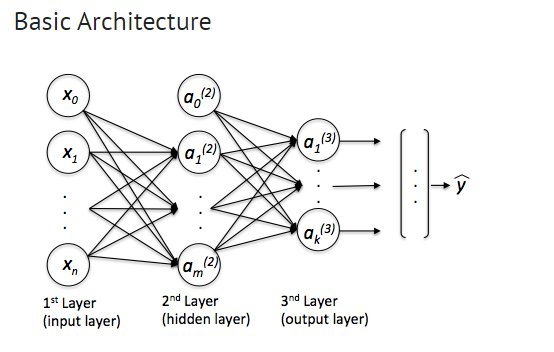

In the above artitecture we are going to use three layers namely input, hidden and output layers. In the hidden layer we will be using sigmoid activation function and in the output layer we are going to use softmax activation function as the problem is of multiclass classification.

**Activation Function:-**

The formula for the sigmoid function is, $$\sigma=\frac{1}{1+e^{-z}}$$

**Loading the dataset:**

In [10]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf


In [11]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.5.0
Eager execution: True


In [12]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [13]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [14]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']


In [15]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [16]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([7.2, 6.4, 6.7, 4.9, 6.8, 6.5, 7.7, 5.4, 4.4, 5.8, 6.1, 5.8, 4.4,
       6. , 7.2, 5. , 4.8, 5. , 6.4, 5.6, 5.7, 5.6, 6.7, 5. , 7. , 6. ,
       5. , 6.3, 7.3, 5.2, 5. , 4.8], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 3.2, 3. , 3.1, 3.2, 3. , 2.8, 3.9, 3. , 2.8, 3. , 4. , 2.9,
       2.7, 3.6, 3. , 3.4, 3.6, 3.1, 2.5, 2.8, 2.9, 3.3, 3.5, 3.2, 3. ,
       3.4, 3.3, 2.9, 3.4, 2.3, 3.1], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.8, 4.5, 5.2, 1.5, 5.9, 5.8, 6.7, 1.3, 1.3, 5.1, 4.9, 1.2, 1.4,
       5.1, 6.1, 1.6, 1.6, 1.4, 5.5, 3.9, 4.1, 3.6, 5.7, 1.6, 4.7, 4.8,
       1.6, 6. , 6.3, 1.4, 3.3, 1.6], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.6, 1.5, 2.3, 0.1, 2.3, 2.2, 2. , 0.4, 0.2, 2.4, 1.8, 0.2, 0.2,
       1.6, 2.5, 0.2, 0.2, 0.2, 1.8, 1.1, 1.3, 1.3, 2.1, 0.6,

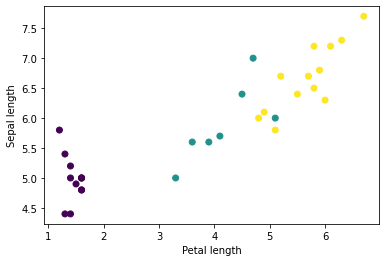

In [17]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [18]:
def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [19]:
train_dataset = train_dataset.map(pack_features_vector)


In [20]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[5.5 2.4 3.8 1.1]
 [6.3 3.3 6.  2.5]
 [5.6 2.9 3.6 1.3]
 [6.1 3.  4.9 1.8]
 [4.9 3.1 1.5 0.1]], shape=(5, 4), dtype=float32)


In [21]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [22]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.78967786,  1.7956337 , -1.5772765 ],
       [ 0.84020114,  2.3636053 , -1.5018735 ],
       [ 0.8098097 ,  1.8543866 , -1.5797982 ],
       [ 0.84866476,  2.134759  , -1.6124291 ],
       [ 0.637305  ,  1.458346  , -1.7328796 ]], dtype=float32)>

In [23]:
tf.nn.softmax(predictions[:5])


<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.26121354, 0.71429354, 0.02449292],
       [0.17593417, 0.80715364, 0.0169122 ],
       [0.25420317, 0.72249514, 0.02330169],
       [0.21258654, 0.76927096, 0.01814246],
       [0.29705957, 0.6751762 , 0.02776422]], dtype=float32)>

In [24]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels: [1 2 1 2 0 0 0 0 1 2 2 2 0 0 2 2 2 0 1 1 0 0 1 2 0 2 2 0 2 1 0 0]


In [25]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [26]:
def loss(model, x, y, training):
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 2.1333603858947754


In [27]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [29]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 2.1333603858947754
Step: 1,         Loss: 1.1206183433532715


In [30]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.021, Accuracy: 68.333%
Epoch 050: Loss: 0.380, Accuracy: 90.833%
Epoch 100: Loss: 0.231, Accuracy: 93.333%
Epoch 150: Loss: 0.146, Accuracy: 95.833%
Epoch 200: Loss: 0.119, Accuracy: 97.500%


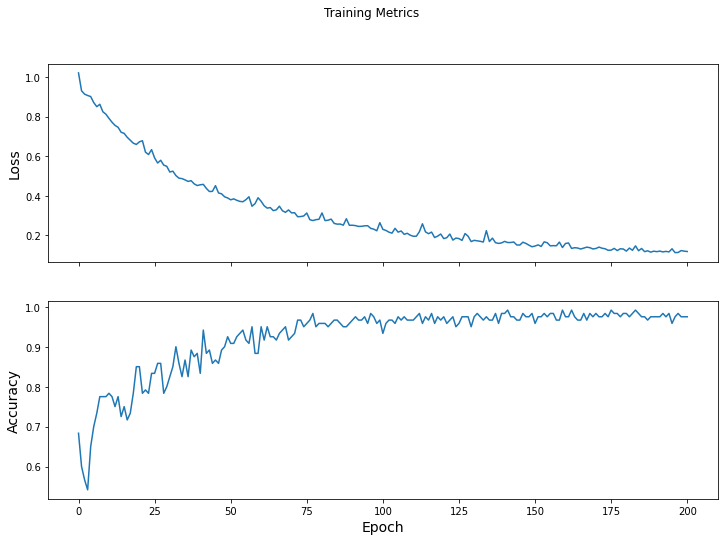

In [31]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()